# Trajectory Analysis
Author: Rudiyanto Gunawan

Date: 09/21/2022

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
#Load data file
results = 'desc_result.n25.L0.65.h5ad'
results_file = '~/Downloads/RNAseq/cluster_by_genes/0.3cutoff/DESC/'+results
adata = sc.read_h5ad(results_file)
adata.obsm['X_desc'] = adata.obsm['X_Embeded_z0.65'].copy()
adata.obs['desc'] = adata.obs['desc_0.65'].copy()

In [3]:
#Load scanpy settings
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=600, figsize=(12, 12), facecolor='white')  # low dpi (dots per inch) yields small inline figures
sc.set_figure_params(dpi=600, color_map = 'viridis_r')
sc.settings.figdir = results+'_figures/'

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 8.2.0
anyio               NA
appnope             0.1.2
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bottleneck          1.3.2
brotli              NA
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.04.0
dateutil            2.8.1
decorator           5.0.6
fsspec              0.9.0
h5py                3.7.0
idna                2.10
ipykernel           5.3.4
ipython_genutils    0.2.0
jedi                0.17.2
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server      1.4.1
jupyterlab_server   2.4.0
kiwisolver          1.3.1
llvmlite            0.36.0
markupsafe          1.1.1
matplotlib          3.6.0
mpl_toolkits        NA
natsort         

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:10)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)


/Users/katie/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


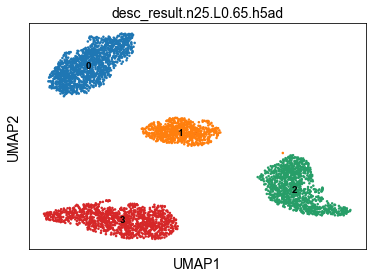

In [4]:
# Perform UMAP analysis for Clusters 0 to 3
adata = adata[adata.obs['desc'].isin([0, 1, 2, 3])]
sc.pp.neighbors(adata, use_rep='X_desc', n_neighbors=15, method = 'umap')
sc.tl.umap(adata, n_components=2)
sc.pl.umap(adata, color=['desc'], show=True, title=results, legend_loc='on data')

drawing single-cell graph using layout 'rt'
    finished: added
    'X_draw_graph_rt', graph_drawing coordinates (adata.obsm) (0:00:00)


/opt/anaconda3/envs/downgrade/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


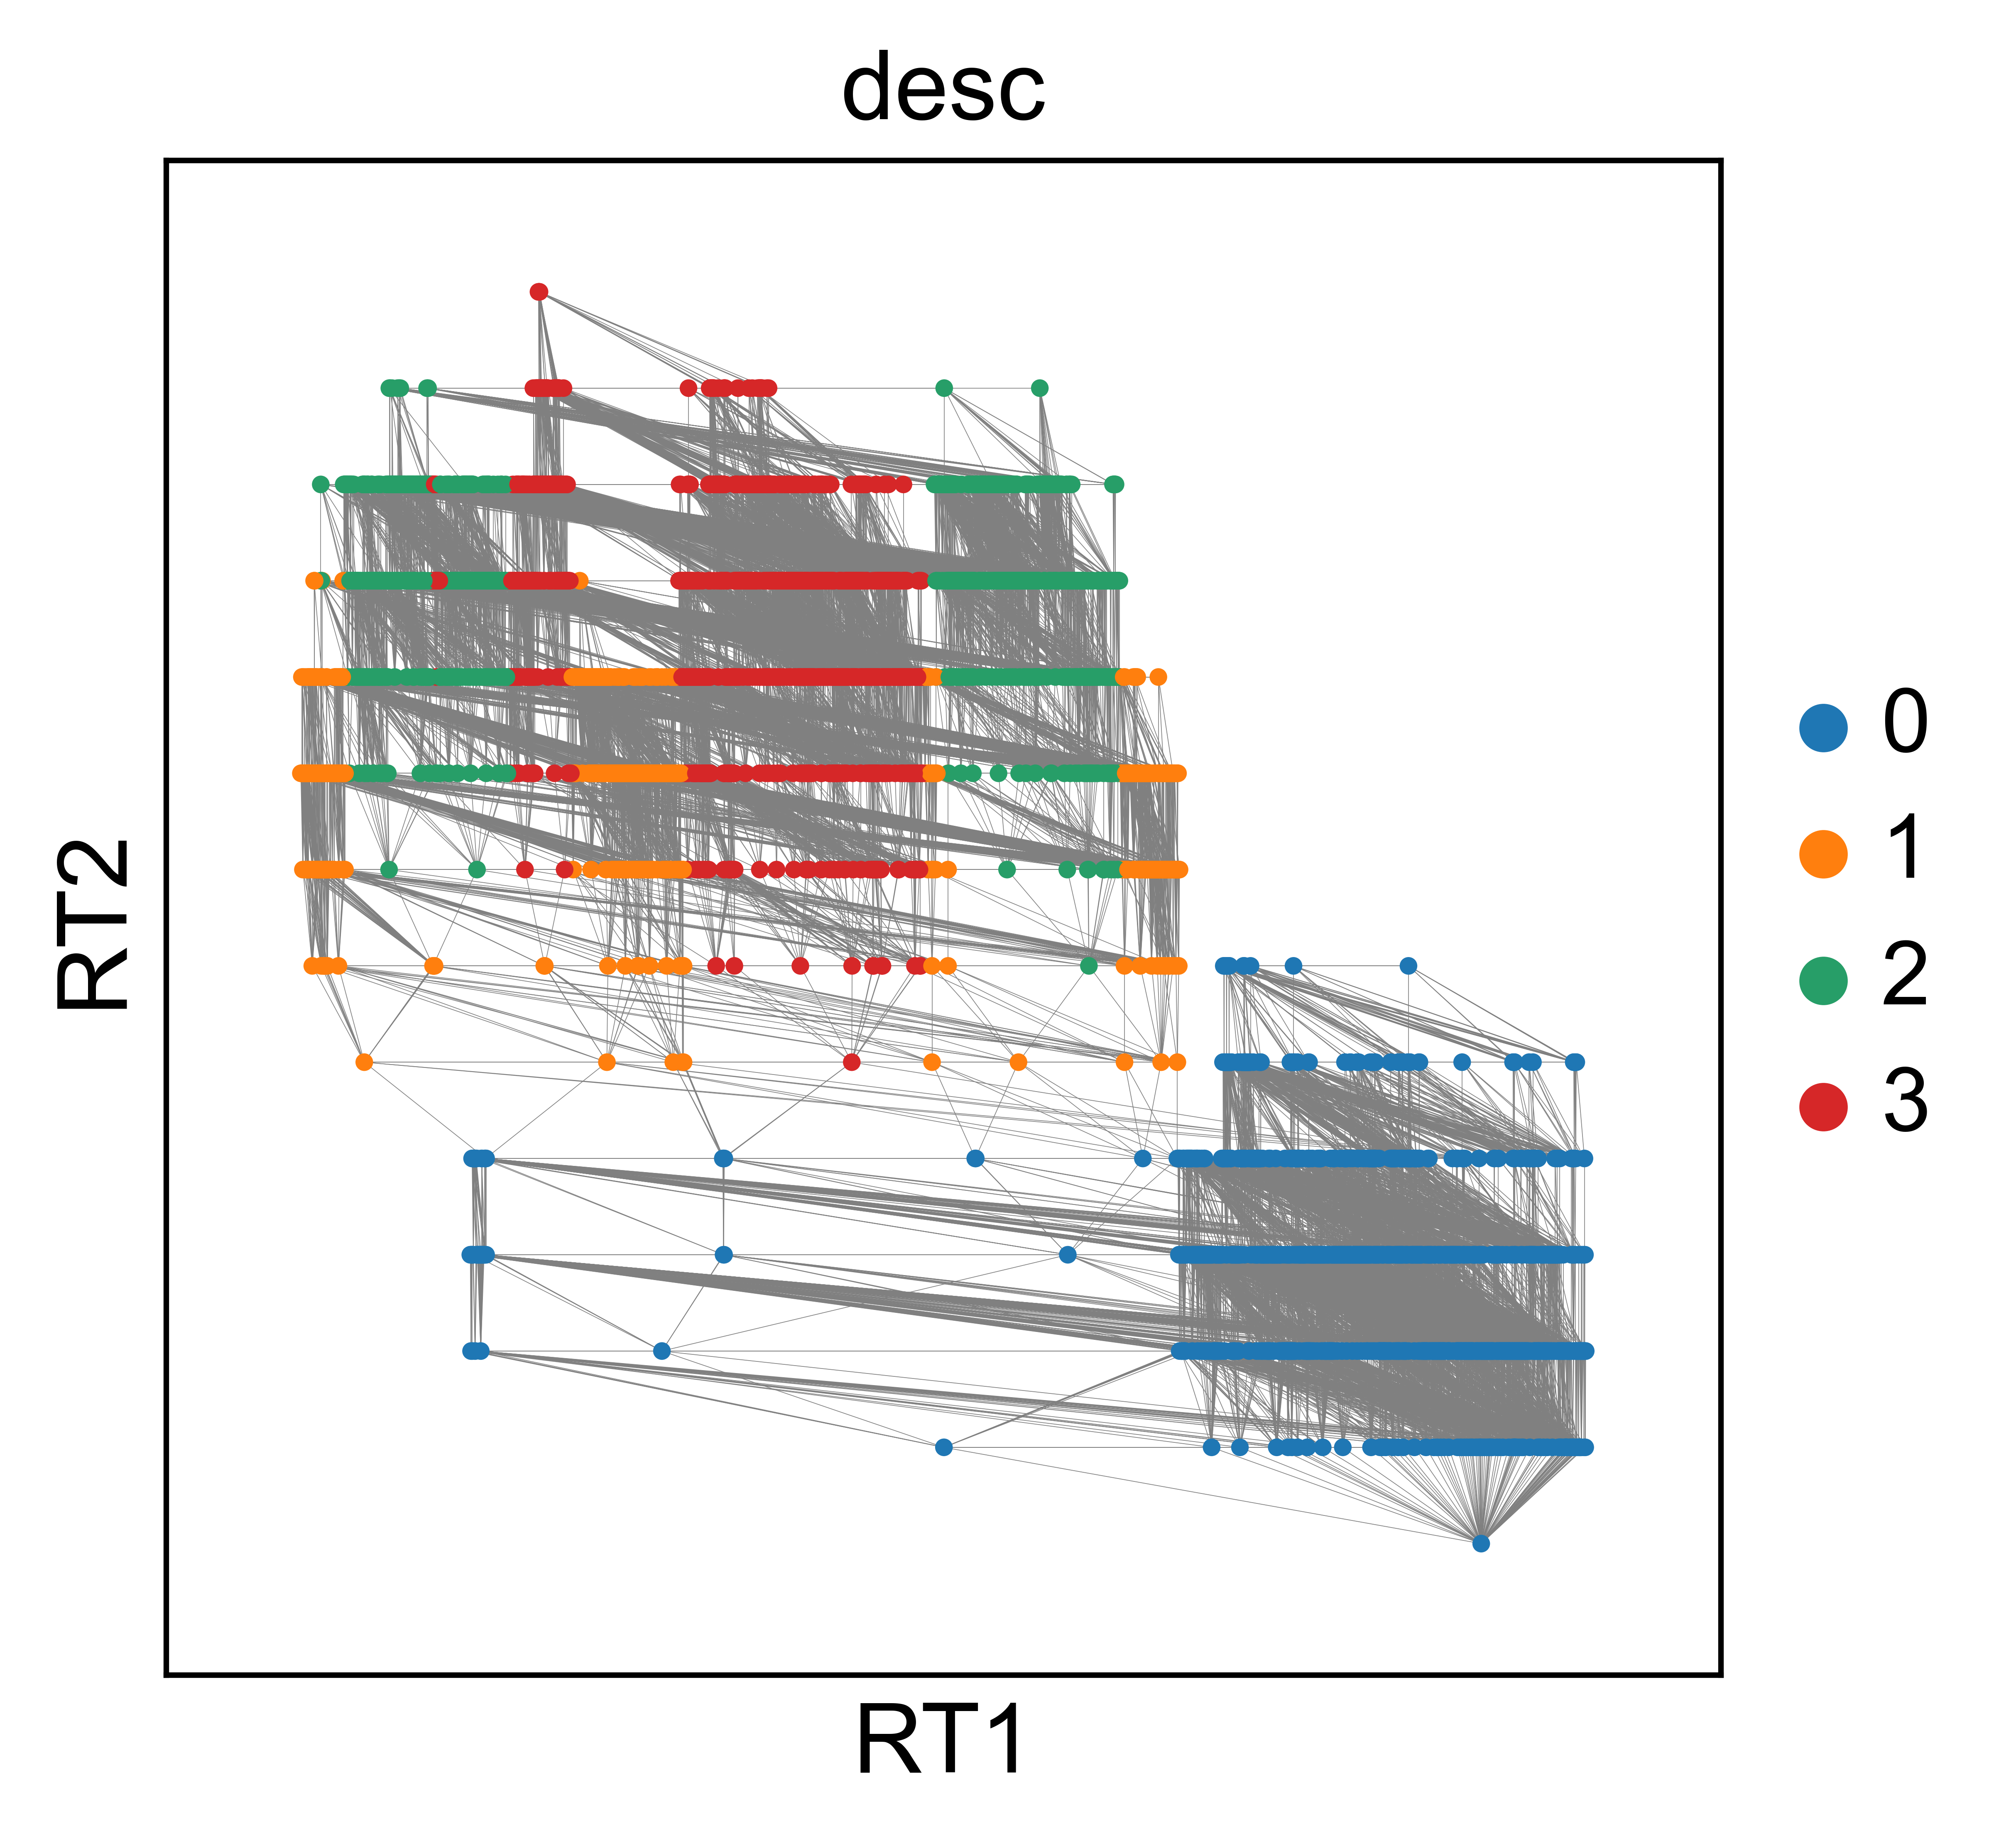

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9994146  0.99938416 0.9976768  0.98035556 0.9770871
     0.96851164 0.9519758  0.9497526  0.94713897 0.92793375 0.9266658
     0.92091024 0.9129208  0.9114029 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing Diffusion Pseudotime using n_dcs=15
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


In [5]:
# Perform Pseudotime Analysis

# Draw Reingold Tilford tree layout of the cells
sc.tl.draw_graph(adata, layout='rt')
sc.pl.draw_graph(adata, color=['desc'], edges=1)

# Set root cell to be the cell from Cluster 0 at the root of the tree
Xrt = adata.obsm['X_draw_graph_rt']
adata.uns['iroot'] = int(np.where(Xrt[:,1]==0)[0])

# Run diffusion pseudotime (DPT) analysis
sc.tl.diffmap(adata, n_comps=15)
sc.tl.dpt(adata, n_dcs=15)

drawing single-cell graph using layout 'lgl'
    finished: added
    'X_draw_graph_lgl', graph_drawing coordinates (adata.obsm) (0:00:22)


/opt/anaconda3/envs/downgrade/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
/opt/anaconda3/envs/downgrade/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(


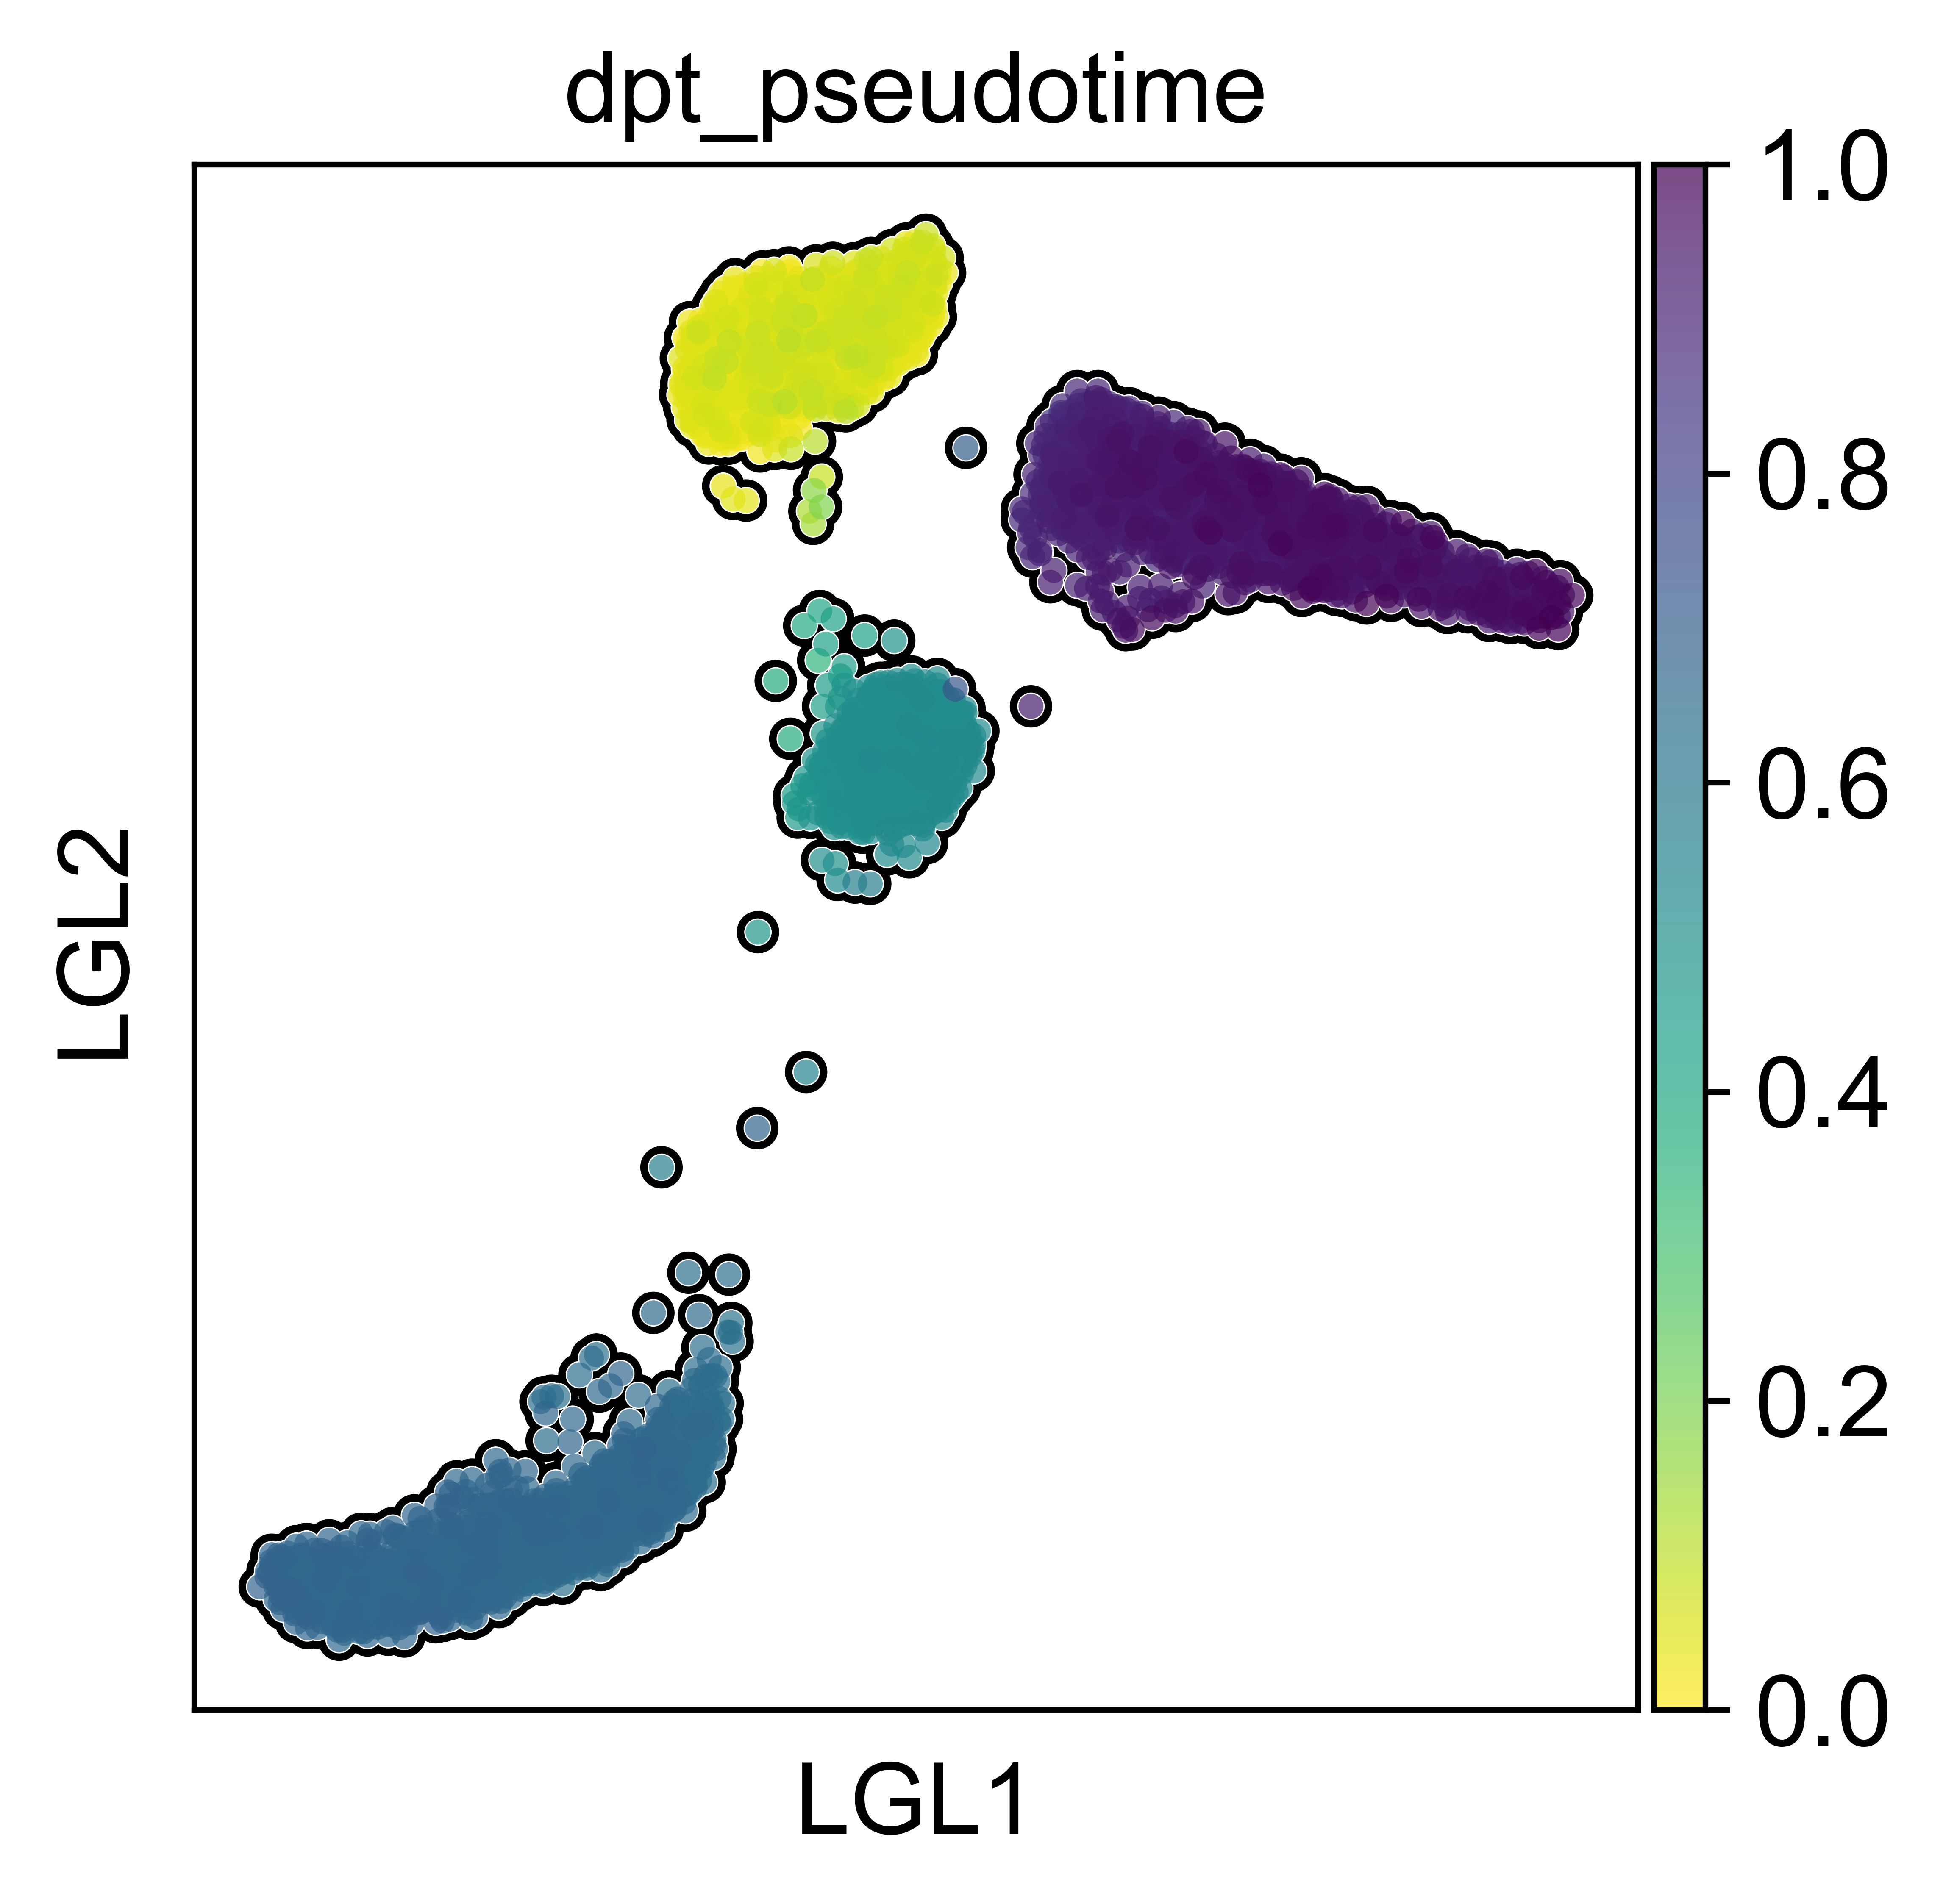

In [6]:
#Visualize pseudotime using LGL (Large Graph Layout)
sc.tl.draw_graph(adata, layout='lgl')
sc.pl.draw_graph(adata, color=['dpt_pseudotime'], size=50, add_outline=True, ncols=1, save='_pub.svg')